In [3]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [47]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\nd\AppData\Roaming\nltk_data...


True

In [4]:
path1 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\1M NobelCitingpapers.zip'
path2 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path3 = r'E:\netData\MAG\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'

In [5]:
f1 = pd.read_csv(path1)
f2 = pd.read_csv(path2)
f3 = pd.read_csv(path3)

In [6]:
f1['Field'] = f1['Nobel'].map(f2.set_index('paperid')['Field'])
f1.dropna(subset = 'title',inplace = True)

In [7]:
stopwordlst = set(stopwords.words('english'))

In [8]:
f1['length'] = f1['title'].apply(len)
f1['words'] = f1['title'].apply(nltk.word_tokenize)
f1['#words'] = f1['words'].apply(len)

In [9]:
lemmatizer = WordNetLemmatizer()

def get_verbs(x):
    verbs_list = []
    pos_tag = nltk.pos_tag(x)
    for pos in pos_tag:
        if pos[1].startswith('V'):
            lemmatized_verb = lemmatizer.lemmatize(pos[0], 'v')  # Lemmatize the verb
            verbs_list.append(lemmatized_verb)
    return verbs_list

def get_nouns(x):
    nouns_list = []
    pos_tag = nltk.pos_tag(x)
    for pos in pos_tag:
        if pos[1].startswith('N'):
            lemmatized_verb = lemmatizer.lemmatize(pos[0], 'n')  # Lemmatize the verb
            nouns_list.append(lemmatized_verb)
    return nouns_list

In [10]:
f1['verbs'] = f1['words'].apply(get_verbs)
f1['nouns'] = f1['words'].apply(get_nouns)

In [11]:
f1['#verbs'] = f1['verbs'].apply(len)
f1['#nouns'] = f1['nouns'].apply(len)

In [12]:
f11 = f1[f1['Field'] == 'Physics']
f12 = f1[f1['Field'] == 'Chemistry']
f13 = f1[f1['Field'] == 'Medicine']

# title length

In [ ]:
plt.subplots(4,3,figsize=(22,20),sharex=True,sharey='row')
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.06,hspace=0.06)
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  'length']
d2 = f12.loc[f12['type'] == 'DC'  ,  'length']
d3 = f13.loc[f13['type'] == 'DC'  ,  'length']
d5 = f11.loc[f11['type'] == 'CC'  ,  'length']
d6 = f12.loc[f12['type'] == 'CC'  ,  'length']
d7 = f13.loc[f13['type'] == 'CC'  ,  'length']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
for _ in range(3):
    ax = plt.subplot(4,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[_],std[_+3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,120))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-15, str(np.round(dd[i] , 2)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks(size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. Title length',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

d1 = f11.loc[f11['type'] == 'DC'  ,  '#words']
d2 = f12.loc[f12['type'] == 'DC'  ,  '#words']
d3 = f13.loc[f13['type'] == 'DC'  ,  '#words']
d5 = f11.loc[f11['type'] == 'CC'  ,  '#words']
d6 = f12.loc[f12['type'] == 'CC'  ,  '#words']
d7 = f13.loc[f13['type'] == 'CC'  ,  '#words']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
for _ in range(3):
    ax = plt.subplot(4,3,_ + 4)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[_],std[_+3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,21))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-2, str(np.round(dd[i] , 2)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,4,8,12,16,20],size = 24)
    if _ == 0:
        plt.ylabel(r'#Words',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

d1 = f11.loc[f11['type'] == 'DC'  ,  '#verbs']
d2 = f12.loc[f12['type'] == 'DC'  ,  '#verbs']
d3 = f13.loc[f13['type'] == 'DC'  ,  '#verbs']
d5 = f11.loc[f11['type'] == 'CC'  ,  '#verbs']
d6 = f12.loc[f12['type'] == 'CC'  ,  '#verbs']
d7 = f13.loc[f13['type'] == 'CC'  ,  '#verbs']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
for _ in range(3):
    ax = plt.subplot(4,3,_ + 7)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[_],std[_+3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,2.1))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-.2, str(np.round(dd[i] , 2)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks([0,0.5,1,1.5,2],size = 24)
    if _ == 0:
        plt.ylabel(r'#Verbs',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)
    
d1 = f11.loc[f11['type'] == 'DC'  ,  '#nouns']
d2 = f12.loc[f12['type'] == 'DC'  ,  '#nouns']
d3 = f13.loc[f13['type'] == 'DC'  ,  '#nouns']
d5 = f11.loc[f11['type'] == 'CC'  ,  '#nouns']
d6 = f12.loc[f12['type'] == 'CC'  ,  '#nouns']
d7 = f13.loc[f13['type'] == 'CC'  ,  '#nouns']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]
for _ in range(3):
    ax = plt.subplot(4,3,_ + 10)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[_],std[_+3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,10.5))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-1.5, str(np.round(dd[i] , 2)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks(size = 24)
    if _ == 0:
        plt.ylabel(r'#Nouns',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)

plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 9 word\0.pdf',bbox_inches = 'tight')

In [10]:
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  'length']
d2 = f12.loc[f12['type'] == 'DC'  ,  'length']
d3 = f13.loc[f13['type'] == 'DC'  ,  'length']
d5 = f11.loc[f11['type'] == 'CC'  ,  'length']
d6 = f12.loc[f12['type'] == 'CC'  ,  'length']
d7 = f13.loc[f13['type'] == 'CC'  ,  'length']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

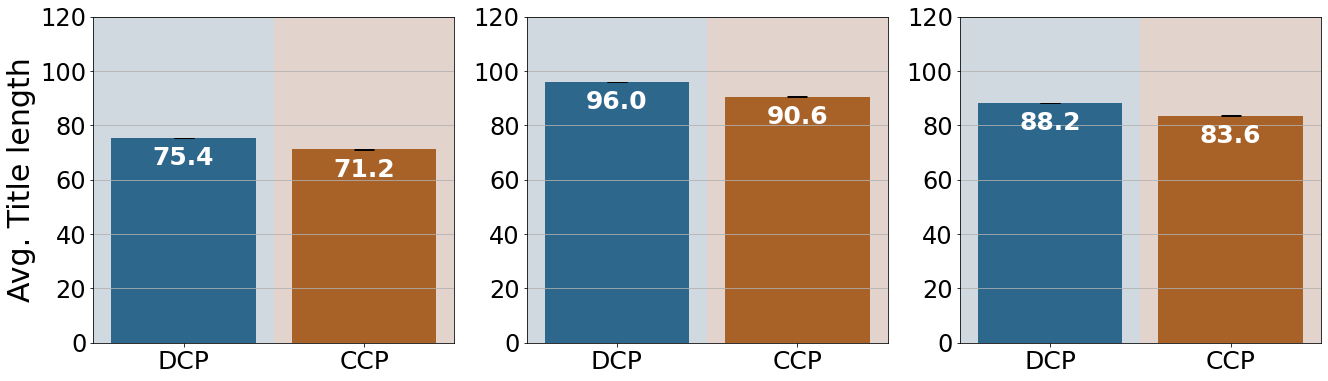

In [13]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,120))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-10, str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks(size = 24)
    if _ == 0:
        plt.ylabel(r'Avg. Title length',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
#     plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)
plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 7 word\1.pdf',bbox_inches = 'tight')

In [14]:
print(scipy.stats.mannwhitneyu(d1 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d6, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d7, alternative='two-sided'))

MannwhitneyuResult(statistic=4829972633.5, pvalue=2.8663153979107922e-114)
MannwhitneyuResult(statistic=11809960543.5, pvalue=1.831849719185719e-279)
MannwhitneyuResult(statistic=15310470955.0, pvalue=2.377107865103951e-264)


In [15]:
x_pos = [1,2,]
colors = ["#1F618D","#AF601A"]
labels = ['Physics','Chemistry','Medicine']
d1 = f11.loc[f11['type'] == 'DC'  ,  '#words']
d2 = f12.loc[f12['type'] == 'DC'  ,  '#words']
d3 = f13.loc[f13['type'] == 'DC'  ,  '#words']
d5 = f11.loc[f11['type'] == 'CC'  ,  '#words']
d6 = f12.loc[f12['type'] == 'CC'  ,  '#words']
d7 = f13.loc[f13['type'] == 'CC'  ,  '#words']
d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d5),np.mean(d6),np.mean(d7)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5,np.std(d7)*len(d7)**-0.5]

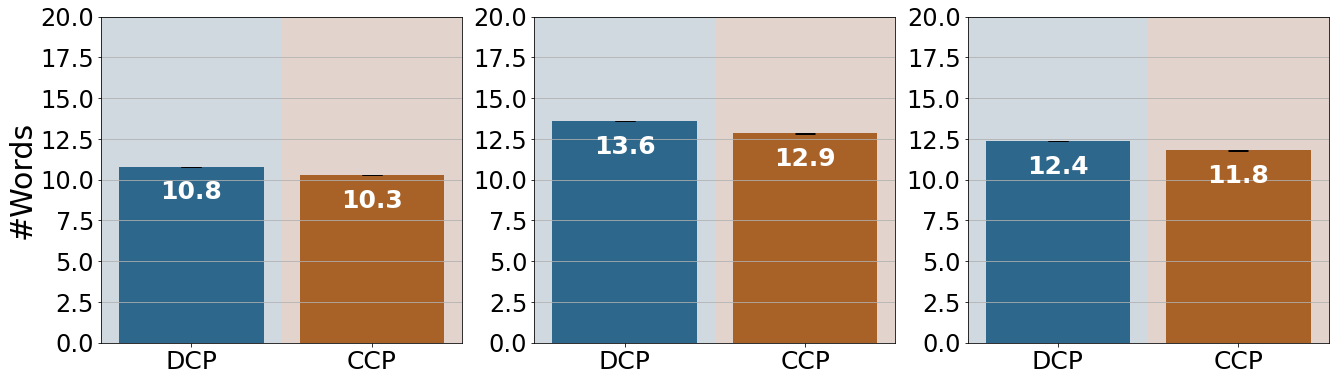

In [20]:
plt.subplots(1,3,figsize=(22,6))
for _ in range(3):
    ax = plt.subplot(1,3,_ + 1)
    dd = [d[_] , d[_+3]]
    plt.bar(x_pos, dd, yerr=[std[0],std[3]],align='center', color= colors,alpha=0.9,capsize=10)
    ax.yaxis.grid(True)
    plt.ylim((0,20))
    plt.xlim(0.5,2.5)
    for i in range(len(dd)):
        plt.text(x_pos[i],dd[i]-2, str(np.round(dd[i] , 1)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    plt.xticks(x_pos,['DCP','CCP'],fontsize = 25)
    plt.yticks(size = 24)
    if _ == 0:
        plt.ylabel(r'#Words',fontsize = 30)
    else:
        plt.ylabel(r'',fontsize = 0)
#     plt.title(labels[_],size = 35)
    ax.axvspan(min(x_pos)-1, max(x_pos) / 2+0.5, facecolor='#154360', alpha=0.2)
    ax.axvspan(max(x_pos) / 2+0.5, max(x_pos)+1, facecolor='#6E2C00', alpha=0.2)
plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 7 word\2.pdf',bbox_inches = 'tight')

# verbs

In [108]:
dD1 = Counter(np.concatenate(f11.loc[f11['type']=='DC' , 'verbs'].values)).most_common(10)
dD2 = Counter(np.concatenate(f12.loc[f12['type']=='DC' , 'verbs'].values)).most_common(10)
dD3 = Counter(np.concatenate(f13.loc[f13['type']=='DC' , 'verbs'].values)).most_common(10)
dC1 = Counter(np.concatenate(f11.loc[f11['type']=='CC' , 'verbs'].values)).most_common(10)
dC2 = Counter(np.concatenate(f12.loc[f12['type']=='CC' , 'verbs'].values)).most_common(10)
dC3 = Counter(np.concatenate(f13.loc[f13['type']=='CC' , 'verbs'].values)).most_common(10)

In [109]:
dDClst = [dD1,dD2,dD3,dC1,dC2,dC3]

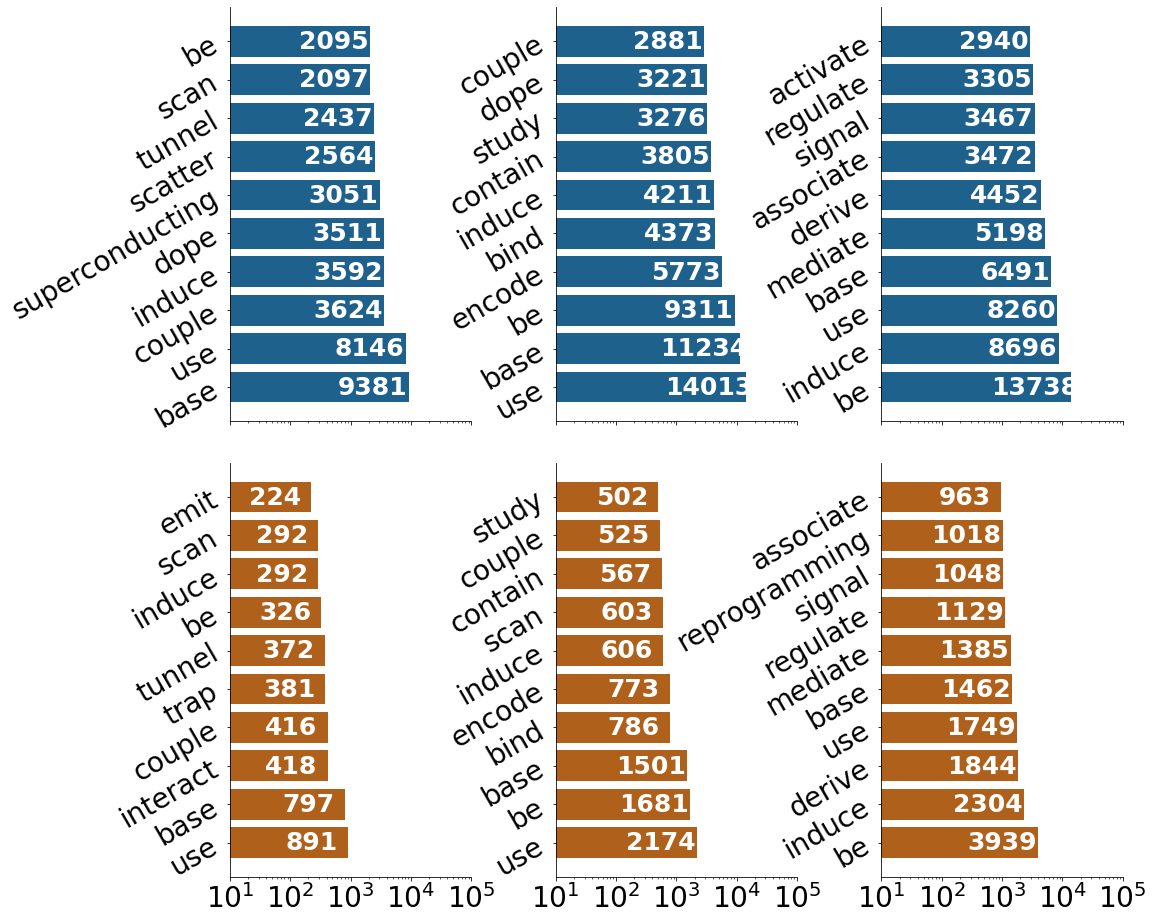

In [110]:
plt.subplots(2,3,figsize=(16,16),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.35,hspace=0.1)

y_pos = range(1,11)
colors = ["#1F618D","#AF601A"]
for j in range(6):
    ax = plt.subplot(2,3,j+1)
    d = pd.DataFrame(dDClst[j])
    ax.set_xscale("log")
    plt.barh(y_pos , d[1] ,align='center',color=colors[j//3],alpha=1 )
    plt.xticks([10,100,1000,10000,100000],size = 28)
    plt.yticks(y_pos ,d[0].values ,size = 28)
    for _ in range(len(d)):
        text = d[1][_]
        plt.text(text*0.25,y_pos[_]-0.2 , str(np.round(text , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    ax.tick_params(axis='y', which='major', labelrotation=30)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 7 word\1.pdf',bbox_inches = 'tight')

# Nouns

In [111]:
dD1 = Counter(np.concatenate(f11.loc[f11['type']=='DC' , 'nouns'].values)).most_common(10)
dD2 = Counter(np.concatenate(f12.loc[f12['type']=='DC' , 'nouns'].values)).most_common(10)
dD3 = Counter(np.concatenate(f13.loc[f13['type']=='DC' , 'nouns'].values)).most_common(10)

dC1 = Counter(np.concatenate(f11.loc[f11['type']=='CC' , 'nouns'].values)).most_common(10)
dC2 = Counter(np.concatenate(f12.loc[f12['type']=='CC' , 'nouns'].values)).most_common(10)
dC3 = Counter(np.concatenate(f13.loc[f13['type']=='CC' , 'nouns'].values)).most_common(10)

In [112]:
dDClst = [dD1,dD2,dD3,dC1,dC2,dC3]

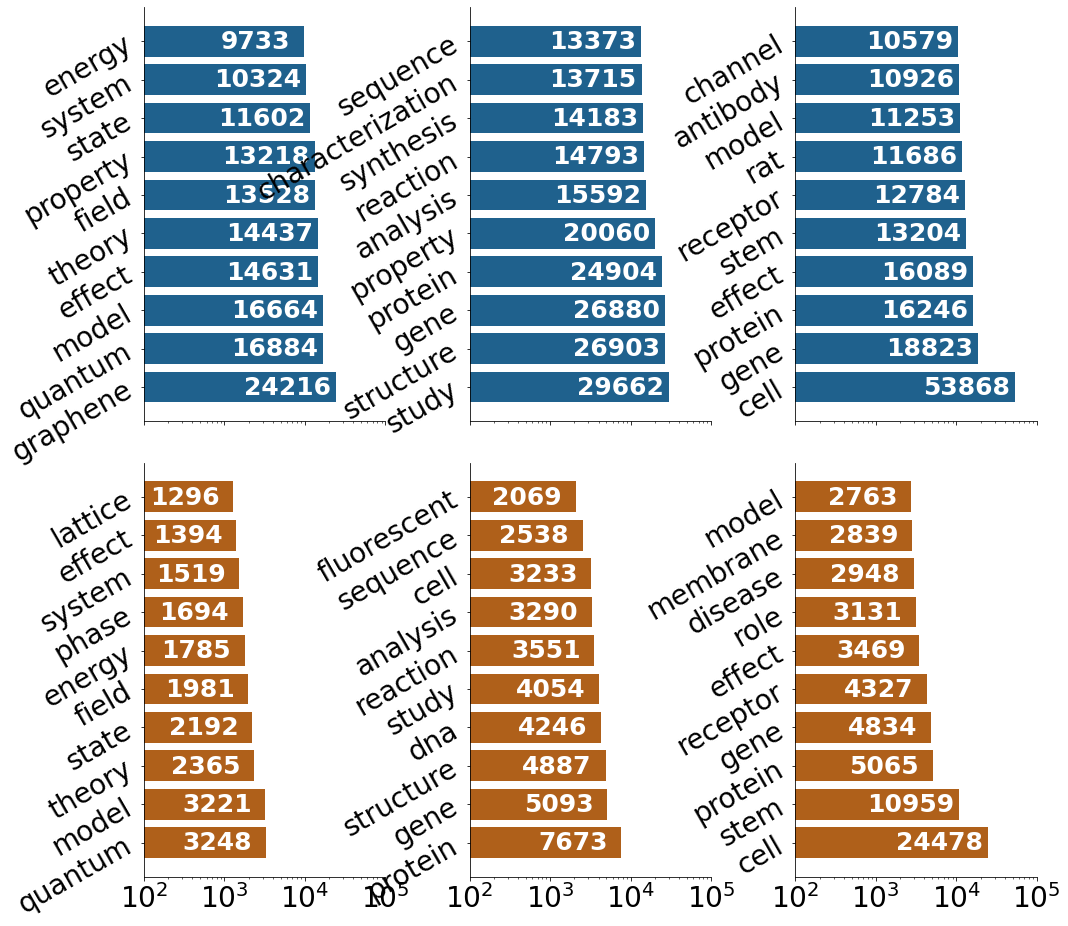

In [113]:
plt.subplots(2,3,figsize=(16,16),sharex=True)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.35,hspace=0.1)

y_pos = range(1,11)
colors = ["#1F618D","#AF601A"]
for j in range(6):
    ax = plt.subplot(2,3,j+1)
    d = pd.DataFrame(dDClst[j])
    ax.set_xscale("log")
    plt.barh(y_pos , d[1] ,align='center',color=colors[j//3],alpha=1 )
    plt.xticks([100,1000,10000,100000],size = 28)
    plt.yticks(y_pos ,d[0].values ,size = 28)
    for _ in range(len(d)):
        text = d[1][_]
        plt.text(text*0.25,y_pos[_]-0.2 , str(np.round(text , 3)),fontsize = 25,c = 'white', ha='center', fontweight='bold')
    ax.tick_params(axis='y', which='major', labelrotation=30)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
plt.savefig(r'G:\A J YANG PAPER\Working paper (under review)\IPM Disruptive and consolidating Citing Papers\2\fig\fig 7 word\2.pdf',bbox_inches = 'tight')